In [6]:
import pandas as pd
import numpy as np

#### 第一步、先看训练数据的一些基本信息，数据的维度，每个维度的值域，再看一下前面几排数据


In [7]:
train_data = pd.read_csv('zhengqi_train.txt',sep='	')
print('shape:',train_data.shape)
for i in range(38):
    print(f'V{i}:','[',train_data['V'+str(i)].min(),train_data['V'+str(i)].max(),']')
print('target:[',train_data['V'+str(i)].min(),train_data['V'+str(i)].max(),']')
train_data.head(10)

shape: (2888, 39)
V0: [ -4.335 2.121 ]
V1: [ -5.122000000000001 1.9180000000000001 ]
V2: [ -3.42 2.8280000000000003 ]
V3: [ -3.9560000000000004 2.457 ]
V4: [ -4.742 2.6889999999999996 ]
V5: [ -2.182 0.489 ]
V6: [ -4.5760000000000005 1.895 ]
V7: [ -5.048 1.9180000000000001 ]
V8: [ -4.692 2.245 ]
V9: [ -12.890999999999998 1.335 ]
V10: [ -2.5839999999999996 4.83 ]
V11: [ -3.16 1.455 ]
V12: [ -5.165 2.657 ]
V13: [ -3.675 2.475 ]
V14: [ -2.455 2.5580000000000003 ]
V15: [ -2.903 4.314 ]
V16: [ -5.981 2.861 ]
V17: [ -2.224 2.023 ]
V18: [ -3.582 4.441 ]
V19: [ -3.7039999999999997 3.431 ]
V20: [ -3.4019999999999997 3.525 ]
V21: [ -2.6430000000000002 2.259 ]
V22: [ -1.375 2.0180000000000002 ]
V23: [ -5.542000000000001 1.906 ]
V24: [ -1.344 2.423 ]
V25: [ -3.8080000000000003 7.284 ]
V26: [ -5.131 2.98 ]
V27: [ -1.1640000000000001 0.925 ]
V28: [ -2.435 4.671 ]
V29: [ -2.912 4.58 ]
V30: [ -4.507 2.6889999999999996 ]
V31: [ -5.859 2.013 ]
V32: [ -4.053 2.395 ]
V33: [ -4.627 5.465 ]
V34: [ -4.789 5.1

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883,0.060
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318,0.415
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899,0.609
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553,0.981
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157,0.818


#### 第二步、看一下验证集的数据情况划分训练特征和训练结果

In [8]:
feature_list = ['V'+str(i) for i in range(38)]

test_data = pd.read_csv('zhengqi_test.txt',sep='	')
test_feat = test_data[feature_list]

test_feat.head()

#验证集没有target，不能对数据进行验证，所以需要将训练集划分成训练和验证集

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [9]:
#将训练集划分成特征和结果数据
train_feat = train_data[feature_list]  #生成训练特征
train_target = train_data['target']    #生成训练结果

#将训练集的特征和结果进一步划分为训练集和验证集，按照8:2的比例进行
from sklearn.model_selection import train_test_split
t_feat,v_feat,t_target,v_target = train_test_split(train_feat,train_target,test_size=0.2,random_state=1)
print(t_feat.shape,v_feat.shape,t_target.shape,v_target.shape)

(2310, 38) (578, 38) (2310,) (578,)


#### 第三步、根据数据初步判断是一个多维回归问题，先用最简单的思路线性回归fit一下，然后用交叉验证来验证整个train_data的准确率。

In [10]:
#注意训练的时候只用t_feat和t_target验证的时候用的是train_feat和train_target

#尝试一：不对输入数据使用正则化
#第1步，先创建一个线性回归模型，fit一下
import sklearn.linear_model as sl
linear_model = sl.LinearRegression()
linear_model.fit(t_feat,t_target)
print(linear_model.intercept_,'\n') #打印训练好的偏置
print(linear_model.coef_)      #打印训练好的权重集合

#第2步，使用交叉验证对整个train数据集进行验证,cv=10表示将整个数据集分成10份，每次取9份计算选中数据的预测值，最后将这10次的每个数据的预测结果取平均值返回
from sklearn.model_selection import cross_val_predict
cross_predict_value = cross_val_predict(linear_model,train_feat,train_target,cv=10)
cross_predict_mse = metrics.mean_squared_error(train_target,cross_predict_value)
print('cross_MSE:',cross_predict_mse)

-0.28249032214646264 

[ 3.62962217e-01  1.80453314e-01  1.76737262e-01  1.27573139e-01
  3.66379068e-02 -9.31148691e-02  1.19962306e-01 -1.66032324e-01
 -2.23045045e-01  4.19701433e-02  3.29237747e-01  4.91042275e-02
  9.46192287e-02 -2.92254237e-03  5.20518693e-02  2.00867740e-02
  1.75444312e-02  8.78769670e-02  9.78510360e-03  2.43033862e-02
 -9.65597429e-04 -8.74573088e-03  1.77847757e-02  1.15275739e-02
 -3.57682620e-02 -1.64996778e-02  3.05428928e-02  1.12937220e+00
 -7.42670134e-03 -5.48316240e-02  2.13664811e-02  1.59180497e-02
 -1.31966008e-02  1.35715978e-02 -1.96018932e-03 -1.69333160e-02
 -2.57382390e-01 -5.14439231e-02]


NameError: name 'metrics' is not defined

In [ ]:
#尝试二：对输入数据进行正则化处理，其余步骤同上
norm_linear_model = sl.LinearRegression(normalize=True)
norm_linear_model.fit(t_feat,t_target)
print(norm_linear_model.intercept_,'\n') #打印训练好的偏置
print(norm_linear_model.coef_)      #打印训练好的权重集合

cross_predict_norm_value = cross_val_predict(norm_linear_model,train_feat,train_target,cv=10)
cross_predict_norm_mse = metrics.mean_squared_error(train_target,cross_predict_norm_value)
print('cross_norm_MSE:',cross_predict_norm_mse)

#### 赛题要求预测结果以mean square error作为评判标准。目前的MSE大概是在0.12，进入不了排行榜前500位，并且对输入做正则化处理之后并没有提升显著结果，接下来考虑两个思路来提升。    
一是用不同的随机数据来训练数据，取效果最好的模型。    
二是分析一下特征的相关性，看能否通过去掉相关性比较低的数据来减少噪音，增加准确度。思路一相对简单，先实现思路一。

In [34]:
#思路一
#步骤一：将整个训练集顺序打散。分成10份，分别用其中的9份数据分别训练10个模型，将10个模型和结果存在列表中。
#步骤二：然后分别将打散的数据分成8、6、4、2份，分别用n-1份数据训练处n个模型，其中n=8、6、4、2,并将结果存在列表中

from sklearn.utils import shuffle
from sklearn import metrics

model_list = []
random_train_feat,random_train_target = shuffle(train_feat,train_target)
train_data_len = len(random_train_feat)
all_index = [i for i in range(2887)]
n=0
init_mse = 1
'''
random_train_feat[i]会报错，因为feat不止一类数据，而一个pd数据后面使用索引只有在数据仅一列时才有效，
random_train_feat.loc[i/list]能运行，但是返回的是索引为i的那行数据
random_train_feat.iloc[i/list]也能运行，返回的是当前pd数据中顺序为i的那一行数据
需要注意的是，每一行数据都会有个索引的号码，一般来说索引的号码和数据当前的序号是相同的，但是当把数据打乱之后，这个索引和序号就不相同了。
这里需要用的是打乱后的数据的序号
'''
for i in range(10,1,-2):
    for j in range(i):
        model_info = []
        model_info.append('model'+str(i)+'_'+str(j))
        model_info[0] = sl.LinearRegression()  #生成模型
        
        unselected_index = [i for i in range(j*int(train_data_len/i),min((j+1)*int(train_data_len/i),2888))]
        selected_index = [i for i in all_index if i not in unselected_index]
        
        random_train_feat_for_train = random_train_feat.iloc[selected_index]
        random_train_target_for_train = random_train_target.iloc[selected_index]
        
        model_info[0].fit(random_train_feat_for_train,random_train_target_for_train)
        
        predict_tmp = model_info[0].predict(train_feat.iloc[unselected_index])
        mse_tmp = metrics.mean_squared_error(train_target.iloc[unselected_index],predict_tmp)
        model_info.append(mse_tmp)
        model_list.append(model_info)
        n=n+1
        if mse_tmp<init_mse:
            init_mse = mse_tmp
        print('model info:',str(i)+'_'+str(j),'index:',n-1,'model_mse:',model_info[1],'min_mse:',init_mse)

model info: 10_0 index: 0 model_mse: 0.061059639235936665 min_mse: 0.061059639235936665
model info: 10_2 index: 2 model_mse: 0.11020904291619603 min_mse: 0.061059639235936665
model info: 10_3 index: 3 model_mse: 0.1421445115188771 min_mse: 0.061059639235936665
model info: 10_4 index: 4 model_mse: 0.060492159198031734 min_mse: 0.060492159198031734
model info: 10_5 index: 5 model_mse: 0.11329182395559911 min_mse: 0.060492159198031734
model info: 10_6 index: 6 model_mse: 0.12509888828613147 min_mse: 0.060492159198031734
model info: 10_7 index: 7 model_mse: 0.10394065285693674 min_mse: 0.060492159198031734
model info: 10_8 index: 8 model_mse: 0.05254305369175427 min_mse: 0.05254305369175427
model info: 10_9 index: 9 model_mse: 0.22514634832238561 min_mse: 0.05254305369175427
model info: 8_0 index: 10 model_mse: 0.07523311334508745 min_mse: 0.05254305369175427
model info: 8_1 index: 11 model_mse: 0.08478630450131343 min_mse: 0.05254305369175427
model info: 8_2 index: 12 model_mse: 0.1169221

In [43]:
#思路二，可以看到数据分布很均匀，选取不同比例的训练数据来训练模型对整个数据集的验证基本上没有影响。
#接下来在上面的基础上，尝试去掉不同的特征看看对结果是否有影响。为了加快训练速度，选择将模型直接分成10份，然后将模型训练10次，取10次的平均损失作为轴坐标的值，横坐标为不同的维度特征。

less_feat_MSE_dict = {}
random_train_feat,random_train_target = shuffle(train_feat,train_target)
train_data_len = len(random_train_feat)
all_index = [i for i in range(2887)]
all_feat_list = ['V'+str(i) for i in range(38)]

for k in range(38):
    mean_MSE_list = []
    unselected_feat = 'V'+str(k)
    print('unselected_feat:',unselected_feat,'\t','down')
    selected_feat = [i for i in all_feat_list if i != unselected_feat]
    less_feat_random_train_feat = random_train_feat[selected_feat]
    for i in range(10,8,-2):
        for j in range(i):
            model_info.append('model'+str(i)+'_'+str(j))
            model_info[0] = sl.LinearRegression()  #生成模型

            unselected_index = [i for i in range(j*int(train_data_len/i),min((j+1)*int(train_data_len/i),2888))]
            selected_index = [i for i in all_index if i not in unselected_index]

            less_feat_random_train_feat_for_train = less_feat_random_train_feat.iloc[selected_index]
            random_train_target_for_train = random_train_target.iloc[selected_index]

            model_info[0].fit(less_feat_random_train_feat_for_train,random_train_target_for_train)

            predict_tmp = model_info[0].predict(train_feat[selected_feat].iloc[unselected_index])
            mse_tmp = metrics.mean_squared_error(train_target.iloc[unselected_index],predict_tmp)
            model_info.append(mse_tmp)
            mean_MSE_list.append(mse_tmp)
    less_feat_MSE_dict[f'V{k}'] = np.mean(mean_MSE_list)

print(less_feat_MSE_dict)

unselected_feat: V0 	 down
unselected_feat: V1 	 down
unselected_feat: V2 	 down
unselected_feat: V3 	 down
unselected_feat: V4 	 down
unselected_feat: V5 	 down
unselected_feat: V6 	 down
unselected_feat: V7 	 down
unselected_feat: V8 	 down
unselected_feat: V9 	 down
unselected_feat: V10 	 down
unselected_feat: V11 	 down
unselected_feat: V12 	 down
unselected_feat: V13 	 down
unselected_feat: V14 	 down
unselected_feat: V15 	 down
unselected_feat: V16 	 down
unselected_feat: V17 	 down
unselected_feat: V18 	 down
unselected_feat: V19 	 down
unselected_feat: V20 	 down
unselected_feat: V21 	 down
unselected_feat: V22 	 down
unselected_feat: V23 	 down
unselected_feat: V24 	 down
unselected_feat: V25 	 down
unselected_feat: V26 	 down
unselected_feat: V27 	 down
unselected_feat: V28 	 down
unselected_feat: V29 	 down
unselected_feat: V30 	 down
unselected_feat: V31 	 down
unselected_feat: V32 	 down
unselected_feat: V33 	 down
unselected_feat: V34 	 down
unselected_feat: V35 	 down
un


feature_value: 0.107
low value feature:
high_value_feat: ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']
high_value_MSE: 0.10972532733186906

feature_value: 0.1071
low value feature:
high_value_feat: ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']
high_value_MSE: 0.10972532733186906

feature_value: 0.1072
low value feature:
high_value_feat: ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V

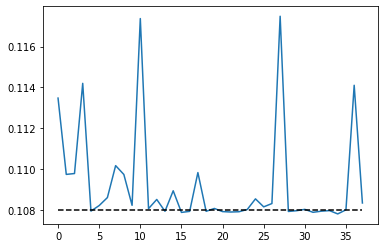

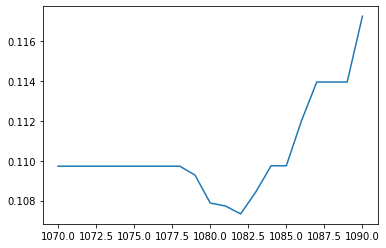

In [52]:
#画图
import matplotlib.pyplot as plt
import time

fig1,ax1 = plt.subplots()
ax1.plot([i for i in range(38)],less_feat_MSE_dict.values())
ax1.plot([i for i in range(38)],[0.108 for i in range(38)],'k--')
fig1.show()

time.sleep(1)

#将上述对结果影响较小的feat（MSE小于设定的feature_value）剔除，创建一个feat训练集来训练数据，观察剔除不同feat对结果的影响

high_value_MSE_list = []

for feature_value in np.arange(0.1070,0.1090,0.0001):
    low_value_feat_list = []
    print('\nfeature_value:',feature_value)
    print('low value feature:')
    for key in less_feat_MSE_dict.keys():
        if less_feat_MSE_dict[key] < feature_value:
            low_value_feat_list.append(key)
            print(key,less_feat_MSE_dict[key])
    
    high_value_feat = [i for i in all_feat_list if i not in low_value_feat_list]
    print('high_value_feat:',high_value_feat)
    high_value_random_train_feat = random_train_feat[high_value_feat] 
    high_value_linear_model = sl.LinearRegression()
    high_value_linear_model.fit(high_value_random_train_feat.iloc[[i for i in range(0,1000)]],random_train_target.iloc[[i for i in range(0,1000)]])
    high_value_pridict = high_value_linear_model.predict(random_train_feat[high_value_feat].iloc[[i for i in range(1000,2888)]])
    high_value_MSE = metrics.mean_squared_error(random_train_target.iloc[[i for i in range(1000,2888)]],high_value_pridict)
    print('high_value_MSE:',high_value_MSE)
    high_value_MSE_list.append(high_value_MSE)

fig2,ax2 = plt.subplots()
ax2.plot([i for i in range(1070,1091)],high_value_MSE_list)
fig2.show()

In [55]:
#根据上面的数据，最终选择0.1082作为特征的分界线，利用如下的特征形成最终的模型
#high_value_feat: ['V0', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V17', 'V24', 'V26', 'V27', 'V36', 'V37']


feature_value=0.1082
low_value_feat_list = []
print('\nfeature_value:',feature_value)
print('low value feature:')
for key in less_feat_MSE_dict.keys():
    if less_feat_MSE_dict[key] < feature_value:
        low_value_feat_list.append(key)
        print(key,less_feat_MSE_dict[key])

high_value_feat = [i for i in all_feat_list if i not in low_value_feat_list]
print('high_value_feat:',high_value_feat)
high_value_random_train_feat = random_train_feat[high_value_feat] 
high_value_linear_model = sl.LinearRegression()
high_value_linear_model.fit(high_value_random_train_feat.iloc[[i for i in range(0,1000)]],random_train_target.iloc[[i for i in range(0,1000)]])

high_value_pridict = high_value_linear_model.predict(train_feat[high_value_feat])
high_value_MSE = metrics.mean_squared_error(train_target,high_value_pridict)
print('high_value_MSE:',high_value_MSE)


feature_value: 0.1082
low value feature:
V4 0.10795281849002177
V11 0.10807319748638292
V13 0.10794389987495387
V15 0.1078880203648425
V16 0.10793922158262237
V18 0.10794250398751351
V19 0.10808152644558586
V20 0.10792804498723452
V21 0.10790781465317259
V22 0.10792144585984494
V23 0.10803115053840973
V25 0.1081598233578436
V28 0.10793414502902685
V29 0.10797221754180115
V30 0.1080370619297655
V31 0.10789349818529223
V32 0.10794861907804783
V33 0.1079768698969854
V34 0.10781469995377439
V35 0.10801526423462911
high_value_feat: ['V0', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V17', 'V24', 'V26', 'V27', 'V36', 'V37']
high_value_MSE: 0.11006690789309505


In [66]:
#对验证集进行预测，产生预测结果,#将预测结果写入新的txt文件，以备提交成果

test_data_feat = pd.read_csv('zhengqi_test.txt',sep='	')
print(test_data_feat.shape)
test_data_predict = high_value_linear_model.predict(test_data_feat[high_value_feat])
test_data_feat['target'] = test_data_predict      #将计算出来的结果增加到读取数据后面
test_data_feat = test_data_feat.round(decimals=3) #将数据控制在小数点后三位
test_data_feat.to_csv('zhengqi_result.txt',sep='	',index=False)    #将结果写入csv文件
test_data_feat #生成包含预测结果的数据

(1925, 38)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388,0.256
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104,0.284
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569,-0.047
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391,0.105
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497,0.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-3.096,-0.444,0.381,1.375,-4.854,-5.331,-4.074,-3.838,...,0.171,-4.488,-5.793,-4.050,-1.187,-0.852,-2.131,-2.564,0.597,-2.850
1921,-2.698,-3.452,-3.620,-1.066,-1.385,1.378,-4.927,-5.103,-4.393,-1.683,...,1.297,-0.613,-7.698,-0.674,-1.187,-0.852,-2.131,-2.564,1.215,-4.067
1922,-2.615,-3.564,-3.402,-0.422,-1.272,1.121,-4.223,-4.315,-5.196,-3.407,...,0.552,0.125,-6.111,0.275,-1.851,-1.548,-1.537,-2.544,1.612,-3.579
1923,-2.661,-3.646,-3.271,-0.699,-1.270,1.116,-3.716,-3.809,-4.735,-2.976,...,0.318,1.086,-5.268,0.683,-1.645,-1.471,-1.537,-2.549,1.431,-3.533
